# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 20% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [6]:
def load_dataset():
    import re
    
    # Load the energy data from the file assets/Energy Indicators.xls.
    Energy = pd.read_excel("Energy Indicators.xls", usecols="C:F")

    # exclude the footer and header, and rename the column names
    Energy = Energy[18:245].reset_index(drop=True)
    Energy = Energy.rename(columns={"Unnamed: 2": "Country", 
                                    "Unnamed: 3": "Energy Supply", 
                                    "Unnamed: 4": "Energy Supply per Capita", 
                                    "Unnamed: 5": "% Renewable"})

    # Convert Energy Supply from petajoule to gigajoules
    Energy["Energy Supply"] = Energy["Energy Supply"].replace({"...": np.nan}).apply(lambda x: x*1000000)

    # Rename countries with numbers and/or parenthesis in their name.
    Energy["Country"] = Energy["Country"].apply(lambda x: re.sub("(\s\(.+\))|[0-9]+", "", str(x)))

    # Rename the following list of countries
    Energy["Country"] = Energy["Country"].replace({"Republic of Korea": "South Korea",
                                           "United States of America": "United States",
                                           "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                           "China, Hong Kong Special Administrative Region": "Hong Kong"})


    # Load the GDP data from the file assets/world_bank.csv.
    GDP = pd.read_csv("world_bank.csv", header=4)
    GDP = GDP.rename(columns={"Country Name": "Country"})

    # rename the following list of countries
    GDP["Country"] = GDP["Country"].replace({"Korea, Rep.": "South Korea", 
                                              "Iran, Islamic Rep.": "Iran",
                                              "Hong Kong SAR, China": "Hong Kong"})
    GDP = GDP.drop(GDP.columns[1:-10], axis=1)

    # Load the Sciamgo Journal and Country Rank data for Energy from the file assets/scimagojr-3.xlsx
    ScimEn = pd.read_excel("scimagojr-3.xlsx")
    
    return (Energy, GDP, ScimEn)


In [9]:
def answer_one():
    # YOUR CODE HERE
    (Energy, GDP, ScimEn) = load_dataset()
    
    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names).
    df = pd.merge(Energy, GDP, how="inner", on="Country")
    df = pd.merge(ScimEn.iloc[:15], df, how="inner", on="Country")
    df.set_index("Country", inplace=True)
    df.sort_values("Rank", inplace=True)
    
    return df
#     raise NotImplementedError()

### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [62]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [12]:
def answer_two():
    # YOUR CODE HERE
    (Energy, GDP, ScimEn) = load_dataset()

    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names).
    df1 = pd.merge(Energy, GDP, how="inner", on="Country")
    df1 = pd.merge(ScimEn.iloc[:15], df1, how="inner", on="Country")
    
    df2 = pd.merge(Energy, GDP, how="outer", on="Country")
    df2 = pd.merge(ScimEn, df2, how="outer", on="Country")
    
    return len(df2) - len(df1)
#     raise NotImplementedError()

### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [15]:
def answer_three():
    # YOUR CODE HERE
    df = answer_one()
    df["avgGDP"] = df.iloc[:, -10:].apply(lambda row: np.nanmean(row), axis=1)
    df = df.sort_values(by="avgGDP", ascending=False)
    
    return df["avgGDP"]
#     raise NotImplementedError()

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [22]:
def answer_four():
    # YOUR CODE HERE
    df = answer_one()
    df["avgGDP"] = df.iloc[:, -10:].apply(lambda row: np.nanmean(row), axis=1)
    df = df.sort_values(by="avgGDP", ascending=False)
    change = df.iloc[5,-1]-df.iloc[5,-10]
    return change

In [46]:
def answer_fourr():
    # YOUR CODE HERE
    (Energy, GDP, _) = load_dataset()
    
    df = pd.merge(GDP, Energy, how="inner", on="Country")
    df["avgGDP"] = df.iloc[:, 1:11].apply(lambda row: np.nanmean(row), axis=1)
    df = df.sort_values(by="avgGDP", ascending=False)[:15]
    df = df.set_index("Country")
    return df.iloc[5,9]-df.iloc[5,0]

### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [55]:
def answer_five():
    # YOUR CODE HERE
    (Energy, _, _) = load_dataset()

    Energy = Energy[(Energy["Energy Supply per Capita"] != "...") & (Energy["Energy Supply per Capita"] != np.nan)]

    return np.mean(Energy["Energy Supply per Capita"])
#     raise NotImplementedError()

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [106]:
def answer_six():
    df = answer_one()
    df = df.sort_values(by="% Renewable", ascending=False)
    df = df.reset_index()
    return (df["Country"][0], df["% Renewable"][0])
    

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [116]:
def answer_seven():
    df = answer_one()
    df["Ratio"] = df["Self-citations"]/df["Citations"]
    df = df.sort_values(by="Ratio", ascending=False)
    df = df.reset_index()
    return (df["Country"][0], df["Ratio"][0])
    return df

In [120]:
%%timeit -n 10
answer_seven()

145 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [154]:
def answer_eight():
    df = answer_one()
    df["Population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
    df = df.sort_values(by="Population", ascending=False)
    df = df.reset_index()
    return df["Country"][2]

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [160]:
def answer_nine():
    from statistics import correlation
    df = answer_one()
    df["Population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
    df["Citable Documents per Person"] = df["Citable documents"]/df["Population"]
    return correlation(df["Citable Documents per Person"], df["Energy Supply per Capita"])
    

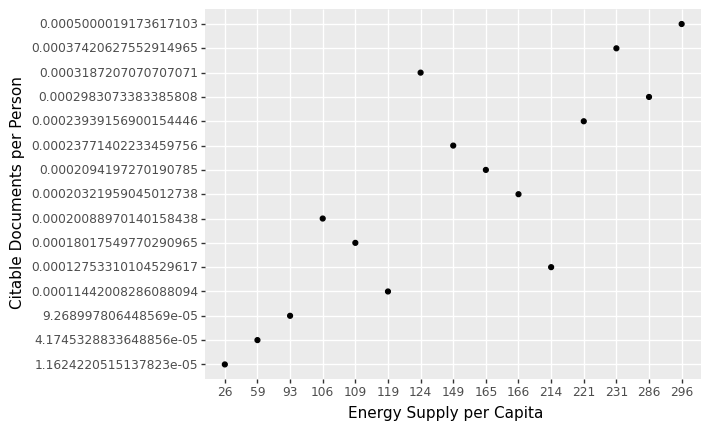

<ggplot: (128671895634)>

In [189]:
import plotnine as p9
df = answer_one()
df["Population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
df["Citable Documents per Person"] = df["Citable documents"]/df["Population"]
plot = (p9.ggplot(data=df, mapping=p9.aes(x='Energy Supply per Capita', y='Citable Documents per Person')))+ p9.geom_point()
plot


In [183]:
def answer_Nine():
    df = answer_one()
    df["Population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
    df["Citable docs per Person"] = df["Citable documents"]/df["Population"]
    new_df = pd.DataFrame({"Citable docs per Capita": list(df["Citable docs per Person"]),
                               "Energy Supply per Capita": list(df["Energy Supply per Capita"])})
    
    return new_df.corr().iloc[0, 1]

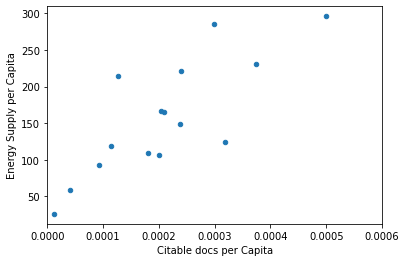

In [187]:
plot9()

81 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
